In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",11)
pd.set_option("display.max_row",100)

In [3]:
dt = pd.read_csv("MagicBricks.csv")
dt.shape

(1259, 11)

In [4]:
dt.head(5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [6]:
dt_eda = dt.copy()

In [7]:
dt_eda.dtypes.value_counts()

object     5
float64    4
int64      2
dtype: int64

<AxesSubplot:>

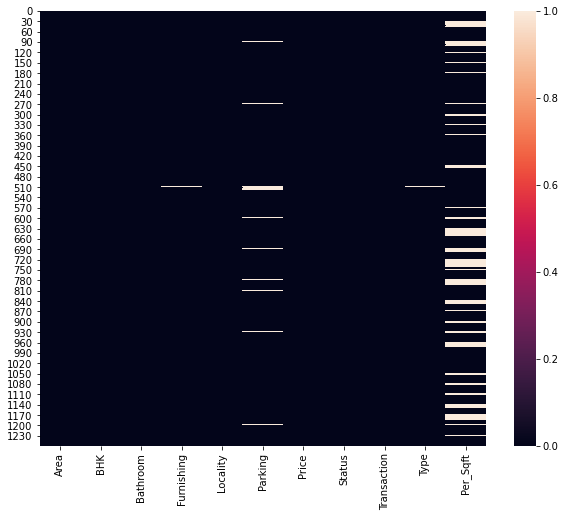

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(dt_eda.isna())

In [9]:
(dt_eda.isna().sum()*100/dt_eda.shape[0]).sort_values()

Area            0.000000
BHK             0.000000
Locality        0.000000
Price           0.000000
Status          0.000000
Transaction     0.000000
Bathroom        0.158856
Furnishing      0.397141
Type            0.397141
Parking         2.621128
Per_Sqft       19.142176
dtype: float64

18.62134944609526


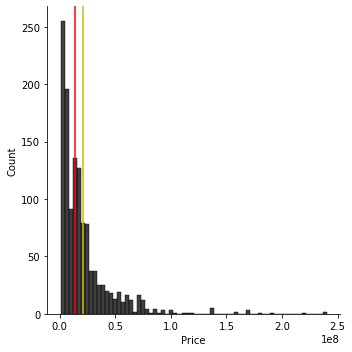

In [10]:
sns.displot(dt_eda["Price"], color='k')
plt.axvline(dt_eda["Price"].mean(), color ="y")
plt.axvline(dt_eda["Price"].median(), color='r')
print(dt_eda["Price"].kurtosis())

In [11]:
dt_eda["Price"].describe().apply(int)

count         1259
mean      21306703
std       25601154
min        1000000
25%        5700000
50%       14200000
75%       25500000
max      240000000
Name: Price, dtype: int64

In [12]:
dist_cat = ["Area","Per_Sqft"]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


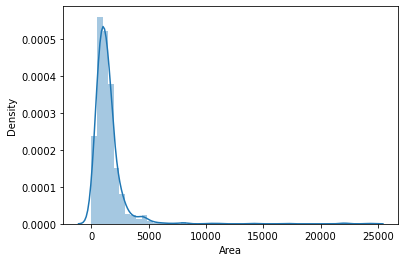

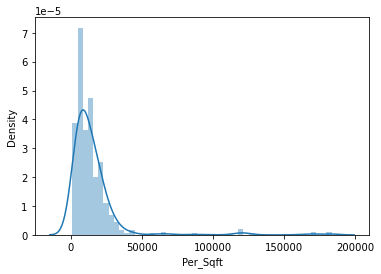

In [13]:
for col in ["Area","Per_Sqft"]:
    plt.figure()
    sns.distplot(dt_eda[col])

In [14]:
cat_columns = []
for col in dt_eda.drop(columns=["Price","Area","Per_Sqft",'Locality']).columns:
    print(f'{col :-<50} {dt_eda[col].unique()}')
    cat_columns.append(col)

BHK----------------------------------------------- [ 3  2  4  1  6  5  7 10]
Bathroom------------------------------------------ [ 2.  3.  4.  1. nan  5.  6.  7.]
Furnishing---------------------------------------- ['Semi-Furnished' 'Furnished' 'Unfurnished' nan]
Parking------------------------------------------- [  1.   5.   2.  nan   4.   9.   3.  39.  10. 114.]
Status-------------------------------------------- ['Ready_to_move' 'Almost_ready']
Transaction--------------------------------------- ['New_Property' 'Resale']
Type---------------------------------------------- ['Builder_Floor' 'Apartment' nan]


In [15]:
cat_columns

['BHK', 'Bathroom', 'Furnishing', 'Parking', 'Status', 'Transaction', 'Type']

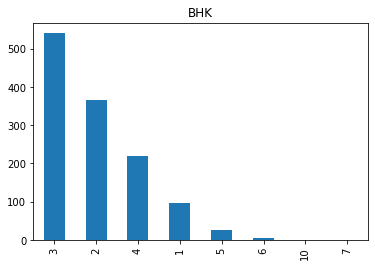

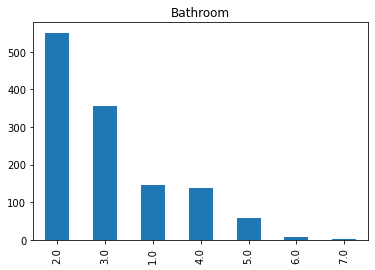

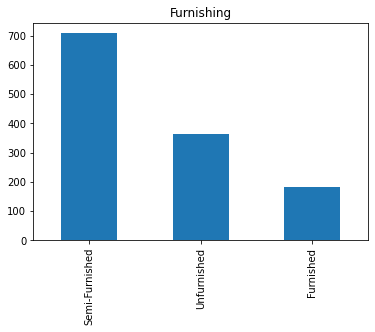

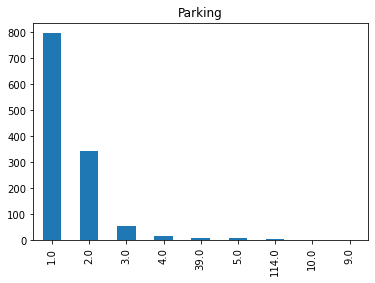

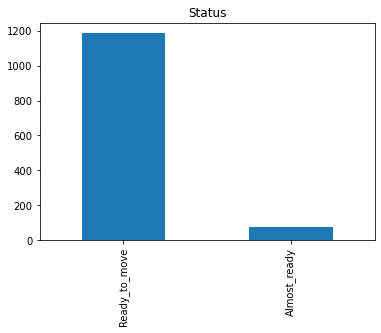

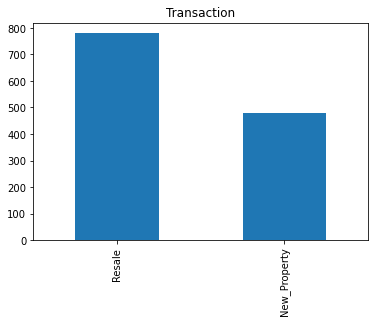

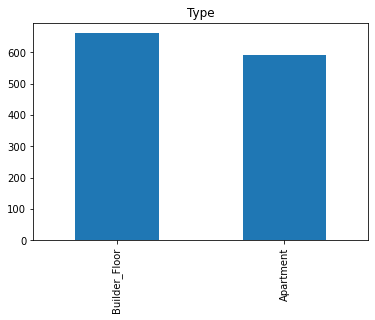

In [16]:
for col in cat_columns:
    plt.figure()
    dt_eda[col].value_counts().plot.bar()
    plt.title(col)

<AxesSubplot:>

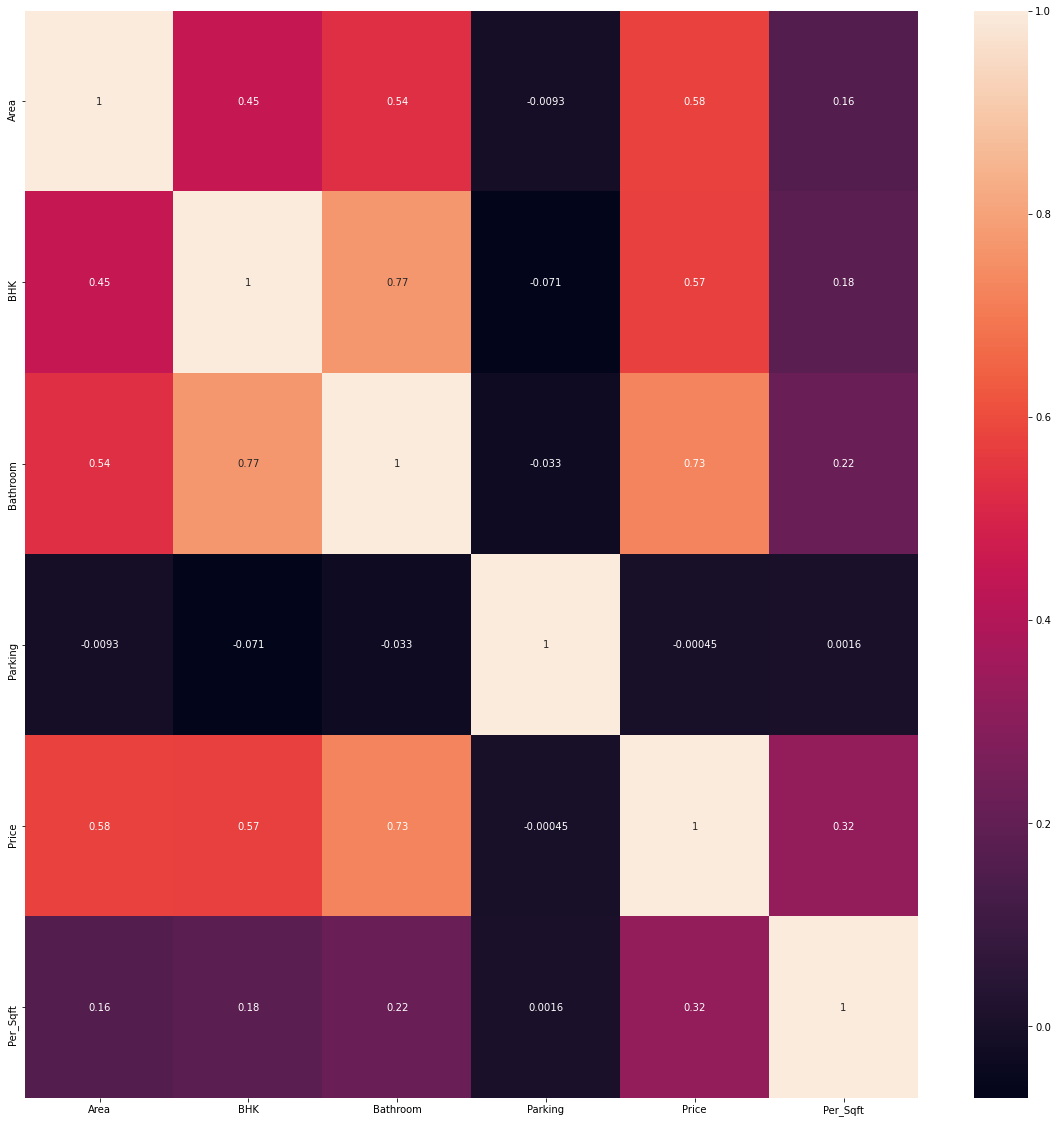

In [17]:
dfcorr = dt_eda.corr()
plt.figure(figsize=(20,20))
sns.heatmap(dfcorr,annot=True)

In [18]:
dfcorr["Price"].sort_values()

Parking    -0.000448
Per_Sqft    0.322859
BHK         0.571523
Area        0.580836
Bathroom    0.728108
Price       1.000000
Name: Price, dtype: float64

In [19]:
num_col = list(dfcorr.columns[(dfcorr["Price"]>0.4) & (dfcorr["Price"]<0.9)])
cat_col = list(dt_eda.drop("Locality",axis=1).select_dtypes("object"))

In [20]:
dt_ml = dt_eda[cat_col+num_col+["Price"]]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(dt_ml.drop(columns=["Price"]),dt_ml["Price"],test_size=0.2)

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.feature_selection import SelectKBest, f_regression

In [24]:
def evaluation(model,y_true = y_test):
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    RMSE= float(format(np.sqrt(mean_squared_error(y_true, y_pred)), ".3f"))
    MSE= mean_squared_error(y_true, y_pred)
    MAE= mean_absolute_error(y_true, y_pred)
    r2= r2_score(y_true, y_pred)
    
    print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 
    
    
    
    
    
    fig = sns.regplot(y_pred, y_true, color = 'red', marker = "*")
    fig.set(title = "Regression Model", xlabel = "Predicted", ylabel = "Actual")
    
    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by = 'y_true')
        )
    
    plt.subplots(figsize = (10, 6))
    sns.scatterplot(data=p_df, x = 'y_true', y = 'error')
    plt.hlines(y = 0, xmin = 0, xmax = 1e8, color = 'red')
    plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [26]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())

In [27]:
preprocessor = make_column_transformer((numerical_pipeline, num_col),
                                   (categorical_pipeline, cat_col))

In [28]:
lr = make_pipeline(preprocessor,SelectKBest(f_regression,k=8),LinearRegression())
poly = make_pipeline(preprocessor,SelectKBest(f_regression,k=8),PolynomialFeatures(2),LinearRegression())
ada = make_pipeline(preprocessor,SelectKBest(f_regression,k=8),PolynomialFeatures(2),AdaBoostRegressor(n_estimators=100))
grad = make_pipeline(preprocessor,SelectKBest(f_regression,k=8),PolynomialFeatures(2),
                     GradientBoostingRegressor(n_estimators=100))

In [29]:
dict_of_models = {'poly': poly,
                  'ada' : ada,
                  'grad': grad,
                  "lr": lr
                 }

poly
RMSE = 17248704.755 
MSE = 297517815727343.75 
MAE = 7715247.746031746 
R2 = 0.6603893361127648


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


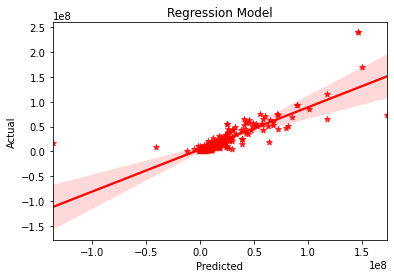

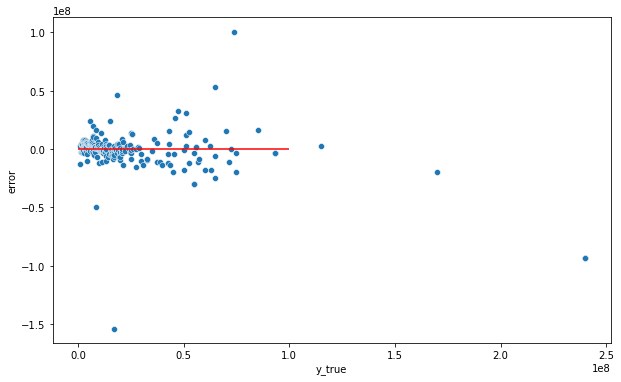

ada
RMSE = 14720922.245 
MSE = 216705551743793.8 
MAE = 8165979.157735513 
R2 = 0.752634926698961


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


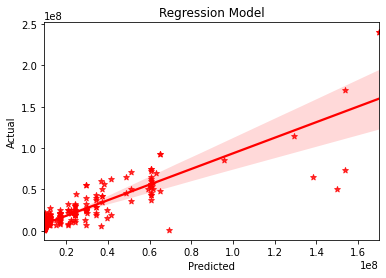

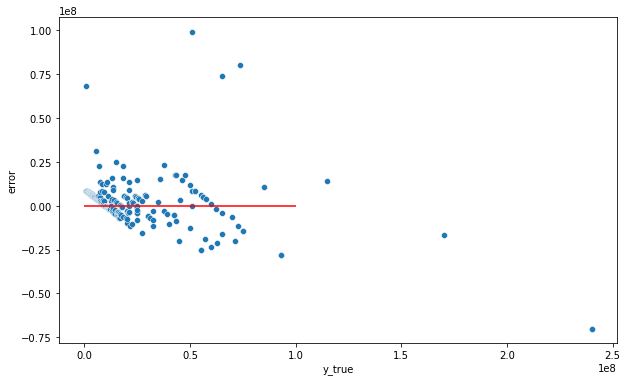

grad
RMSE = 13984944.214 
MSE = 195578664655856.97 
MAE = 6517986.828376748 
R2 = 0.7767508477313345


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


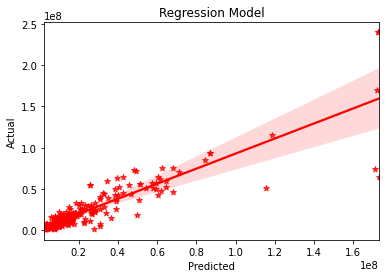

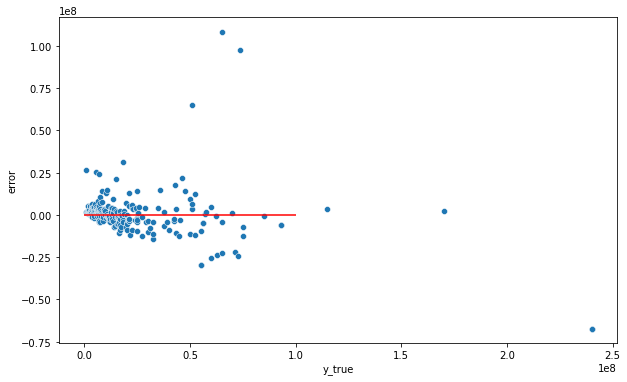

lr
RMSE = 21135056.849 
MSE = 446690627996074.06 
MAE = 10178607.346900916 
R2 = 0.4901115405304771


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


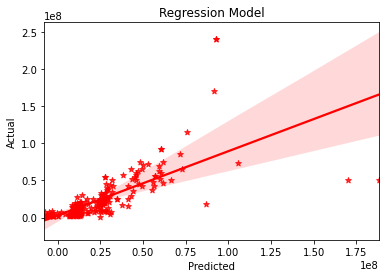

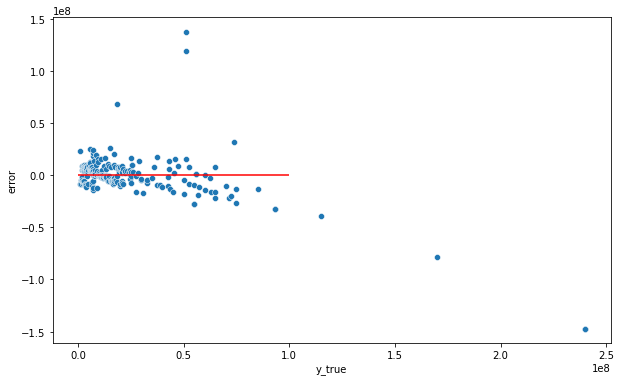

In [30]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

### the best model is GradientBoostingRegressor